# Endrance Track Data

This Notebook documents my process of using data from the race track to make steering design decisions.

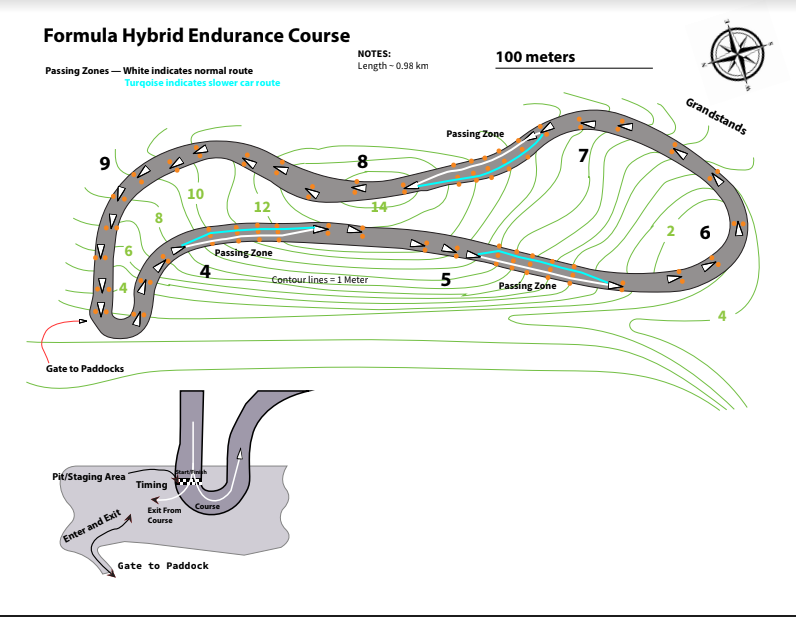

In [19]:
data = csvread('coursedata.csv'); %points taken from imagej
data = data(2:end,:); %take out 0th point
X = data(:,6);
Y = data(:,7);

X(length(X+1))=X(1); %returning to the finish line
Y(length(Y+1))=Y(1);

Z = zeros(length(X),1);
scale = 100/154; %meters/pixel
station(1)=0;
for i=2:length(X)
    delta = sqrt((X(i)-X(i-1))^2+(Y(i)-Y(i-1))^2+(Z(i)-Z(i-1))^2);
    station(i)=delta+station(i-1);
end
station=station(1:length(station)-1)*scale;
tracklength=(station(end)) %in meters

tracklength =  982.67


Using the data I calculated the station for each coordinate point. This was done by taking the distance between points and then summing them. For validation purposes, the track length is nominally .98 km and my calculated length is .982 km.

rmin =  6.3236


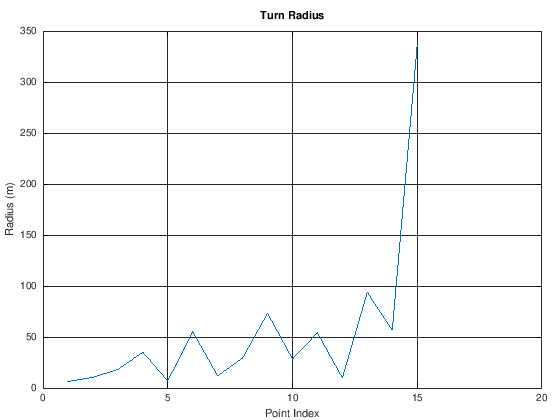

In [32]:
nu=zeros(length(X),1); %Change in angle
for i=2:length(X)
    nu(i) = atan2(Y(i)-Y(i-1),X(i)-X(i-1));
end
nu=nu(2:end);
K=diff(nu)./diff(station)';
r=abs(1./K);
plot(r(1:15))
title 'Turn Radius'
xlabel 'Point Index'
ylabel 'Radius (m)'
grid on
rmin=min(r(1:15))

The first turn seems to be the sharpest turn. If we look at the turning radius values for the points around that turn, the minimum turning radius seems to be around 6 meters. 

In [34]:
%theta = L/R
wheelbase = 1.5621 %meters
theta = wheelbase/rmin %radians
thetadegrees = theta/pi*180 %degrees

wheelbase =  1.5621
theta =  0.24703
thetadegrees =  14.154


Assuming our car has parrallel steering, both front wheels would need to turn left at 14 degrees in order to make this turn.